# Aller à la section 2 pour le calcul

In [207]:
#Inizializzazione
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import commun

from sklearn import preprocessing
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

# 1.1. Définition de la fonction de nettoyage générique d'un DataFrame
Élimine lignes et colonnes vides et dupliquées


In [208]:
#1.1 Fonction de nettoyage des df

def nettoyage(df_to_clean, label):
    print("Nettoyage du jeu de données: \"%s\" " % label)
    llignes1, lcols1 = df_to_clean.shape
    print(llignes1, lcols1)
    df_to_clean_nac = df_to_clean.dropna(axis=1, how='all')
    llignes2, lcols2 = df_to_clean_nac.shape
    print("Après dropna, cols:", llignes2, lcols2)
    print("Colonnes de moins:\n", lcols1 - lcols2)

    df_to_clean_nacl = df_to_clean_nac.dropna(axis=0, how='all')
    llignes3, lcols3 = df_to_clean_nacl.shape
    print("Après dropna, lignes:", llignes3, lcols3)
    print("Lignes de moins:\n", llignes2 - llignes3)

    df_clean = df_to_clean_nacl.drop_duplicates()
    llignes4, lcols4 = df_clean.shape

    pd.set_option('display.float_format', '{:.2f}'.format)
    np.set_printoptions(precision=4)
    dcount_x \
        = pd.DataFrame(
        df_clean.count()).reset_index().rename(
        columns={'index': 'Indicator', 0: 'count'})
    # print(dcount_x)
    dcount_3 \
        = pd.Series(
        np.array(
            df_clean.count().tolist())*100/llignes3).rename('percentage')
    dcount_4 \
        = pd.Series(
        llignes3-np.array(df_clean.count().tolist())).rename('vides')
    df_count = dcount_x.merge(dcount_3,left_index=True, right_index=True)
    df_count = df_count.merge(dcount_4, left_index=True, right_index=True)

    print(df_count)

    print("\nRemove duplicates -> Lignes de moins:%i\n"
          % (llignes2 - llignes4))
    # df_clean.shape

    print('Output: ', df_clean.shape)
    print("\n--------------------------------\n")

    return df_clean


# 1.2 Définition de la fonction de fusion de plusieurs DataFrames

In [209]:
def create_df_from_two_dfs_join(l_df, l_merge, how_instr):
    n_joins = len(l_merge)
    print(n_joins, 'mergers to do.\n\n')

    for j in range(n_joins):
        col_merge_on = l_merge[j][2]
        print('merger n.', j, '(%s)' % col_merge_on)

        if j == 0:
            ind_df1 = l_merge[j][0][0]
            ind_df2 = l_merge[j][1][0]

            # df1 = l_df[ind_df1]
            df1 = l_df[ind_df1][l_merge[j][0][1]]
            df1 = df1.astype(str)
            # https://stackoverflow.com/
            # questions/64385747/valueerror-you-are-trying-to-merge-
            # on-object-and-int64-columns-when-use-pandas
            print('DF1:', len(df1.columns.tolist()))
            print(len(l_merge[j][0][1]), df1.columns)
            print('df1.shape before dropna on %s:'
                  % col_merge_on, df1.shape )
            df1 = df1.dropna(axis=0, subset=[col_merge_on])
            print('df1.shape after dropna on %s:'
                  % col_merge_on, df1.shape )
            # df1 = df1.drop_duplicates(subset=col_merge_on)
            df1 = df1.sort_values(by=col_merge_on, ascending=False)
            display(df1.head(2))
            print('df1[col_merge_on].shape', df1[col_merge_on].shape)

            # df2 = l_df[ind_df2]
            df2 = l_df[ind_df2][l_merge[j][1][1]]
            df2 = df2.astype(str)
            print('DF2:', len(df2.columns.tolist()))
            print(len(l_merge[j][1][1]), df2.columns)
            print(df2.shape)
            print('df2.shape before dropna on %s:'
                  % col_merge_on, df2.shape)
            df2 = df2.dropna(axis=0, subset=[col_merge_on])
            print('df2.shape after dropna on %s:'
                  % col_merge_on, df2.shape)

            # df2 = df2.drop_duplicates(subset=col_merge_on)
            df2 = df2.sort_values(by=col_merge_on, ascending=False)
            display(df2.head(2))
            print('df2[col_merge_on].shape', df2[col_merge_on].shape)

            df1 = pd.merge(df1, df2, how=how_instr, on=col_merge_on)

            print('Output of merger n.1', df1.shape)
            print(len(df1.columns.tolist()), df1.columns)
            display(df1.head(2))

            print('End of merger 1\n')

        else:
            ind_df2 = l_merge[j][1][0]
            df2 = l_df[ind_df2][l_merge[j][1][1]]

            df1 = df1.astype(str)
            # https://stackoverflow.com/questions/64385747/
            # valueerror-you-are-trying-to-merge-on-object
            # -and-int64-columns-when-use-pandas
            print('df1.shape before dropna on %s:'
                  % col_merge_on, df1.shape)
            df1 = df1.dropna(axis=0, subset=[col_merge_on])
            print('df1.shape after dropna on %s:'
                  % col_merge_on, df1.shape)
            df1 = df1.sort_values(by=col_merge_on, ascending=False)
            print('DF1', df1[col_merge_on].shape, '(df1.head(2))')
            display(df1.head(2))

            df2 = df2.astype(str)

            print('df2.shape before dropna on %s:'
                  % col_merge_on, df2.shape)
            df2 = df2.dropna(axis=0, subset=[col_merge_on])
            print('df2.shape after dropna on %s:'
                  % col_merge_on, df2.shape)

            df2 = df2.sort_values(by=col_merge_on, ascending=False)
            print('DF2', df2[col_merge_on].shape, '(df2.head(2))')
            display(df2.head(2))

            df1 = pd.merge(df1, df2, how=how_instr, on=col_merge_on)

            print('Output of merger n.', j, df1.shape)
            print(len(df1.columns.tolist()), df1.columns)
            display(df1.head(2))

    return df1


# 1.3 Importation et caracterisation des jeux de données

In [210]:
l_fichiers = ['olist_customers_dataset', 'olist_geolocation_dataset',
              'olist_order_items_dataset',
              'olist_order_payments_dataset',
              'olist_order_reviews_dataset', 'olist_orders_dataset',
              'olist_products_dataset', 'olist_sellers_dataset',
              'product_category_name_translation']
l_df = []

for i in l_fichiers:
  df = pd.read_csv("data/%s.csv" % i, sep= ',', low_memory=False )
  df = nettoyage(df, str(l_fichiers.index(i)))
  l_df.append(df)


Nettoyage du jeu de données: "0" 
99441 5
Après dropna, cols: 99441 5
Colonnes de moins:
 0
Après dropna, lignes: 99441 5
Lignes de moins:
 0
                  Indicator  count  percentage  vides
0               customer_id  99441      100.00      0
1        customer_unique_id  99441      100.00      0
2  customer_zip_code_prefix  99441      100.00      0
3             customer_city  99441      100.00      0
4            customer_state  99441      100.00      0

Remove duplicates -> Lignes de moins:0

Output:  (99441, 5)

--------------------------------

Nettoyage du jeu de données: "1" 
1000163 5
Après dropna, cols: 1000163 5
Colonnes de moins:
 0
Après dropna, lignes: 1000163 5
Lignes de moins:
 0
                     Indicator   count  percentage   vides
0  geolocation_zip_code_prefix  738332       73.82  261831
1              geolocation_lat  738332       73.82  261831
2              geolocation_lng  738332       73.82  261831
3             geolocation_city  738332       73.82  26

# 3. Création du dataframe complet à traiter: df_all_start
> Un df de commandes

In [211]:
l_merge = [[[0, ['customer_id', 'customer_unique_id']],
            [5, ['customer_id', 'order_id', 'order_status',
                 'order_purchase_timestamp',
                 'order_delivered_carrier_date',
                 'order_estimated_delivery_date']],
            'customer_id'],
           [[], [2, ['order_id', 'order_item_id',
                     'product_id', 'price', 'freight_value' ]],
            'order_id'],
           [[], [4, ['order_id','review_score']], 'order_id'],
           [[], [3, ['order_id', 'payment_sequential', 'payment_type',
                     'payment_installments', 'payment_value']],
            'order_id']]

df_merge_1 = create_df_from_two_dfs_join(l_df, l_merge, 'left')
df_all_start = nettoyage(df_merge_1, 'all')

# Pour chaque ligne de la commande order_id,
# on retient seulement la première ligne

df_all_start['dup'] = df_all_start.duplicated(subset='order_id',
                                              keep='first')
# importantissimo per evitare ripetizioni

4 mergers to do.


merger n. 0 (customer_id)
DF1: 2
2 Index(['customer_id', 'customer_unique_id'], dtype='object')
df1.shape before dropna on customer_id: (99441, 2)
df1.shape after dropna on customer_id: (99441, 2)


,customer_id,customer_unique_id
95945,ffffe8b65bbe3087b653a978c870db99,736e6bfa0510aa5b878881a226a5fd89
33870,ffffa3172527f765de70084a7e53aae8,48fd7dec70f2b104a1d5e8c5c639102b


df1[col_merge_on].shape (99441,)
DF2: 6
6 Index(['customer_id', 'order_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_carrier_date', 'order_estimated_delivery_date'],
      dtype='object')
(99441, 6)
df2.shape before dropna on customer_id: (99441, 6)
df2.shape after dropna on customer_id: (99441, 6)


,customer_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date
26445,ffffe8b65bbe3087b653a978c870db99,2e935fa1d39497aa0ec3f1107fbfb5b8,unavailable,2017-09-29 14:07:03,nan,2017-10-24 00:00:00
73902,ffffa3172527f765de70084a7e53aae8,d0e7be325a1c986babc4e1cdb91edc03,delivered,2017-09-02 11:53:32,2017-09-08 20:04:11,2017-09-26 00:00:00


df2[col_merge_on].shape (99441,)
Output of merger n.1 (99441, 7)
7 Index(['customer_id', 'customer_unique_id', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_estimated_delivery_date'],
      dtype='object')


,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date
0,ffffe8b65bbe3087b653a978c870db99,736e6bfa0510aa5b878881a226a5fd89,2e935fa1d39497aa0ec3f1107fbfb5b8,unavailable,2017-09-29 14:07:03,nan,2017-10-24 00:00:00
1,ffffa3172527f765de70084a7e53aae8,48fd7dec70f2b104a1d5e8c5c639102b,d0e7be325a1c986babc4e1cdb91edc03,delivered,2017-09-02 11:53:32,2017-09-08 20:04:11,2017-09-26 00:00:00


End of merger 1

merger n. 1 (order_id)
df1.shape before dropna on order_id: (99441, 7)
df1.shape after dropna on order_id: (99441, 7)
DF1 (99441,) (df1.head(2))


,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date
40883,96d649da0cc4ff33bb408b199d4c7dcf,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,fffe41c64501cc87c801fd61db3f6244,delivered,2018-06-09 17:00:18,2018-06-11 14:11:00,2018-06-28 00:00:00
28579,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-25 00:00:00


df2.shape before dropna on order_id: (112650, 5)
df2.shape after dropna on order_id: (112650, 5)
DF2 (112650,) (df2.head(2))


,order_id,order_item_id,product_id,price,freight_value
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,43.0,12.79
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72


Output of merger n. 1 (113425, 11)
11 Index(['customer_id', 'customer_unique_id', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id', 'price',
       'freight_value'],
      dtype='object')


,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,order_item_id,product_id,price,freight_value
0,96d649da0cc4ff33bb408b199d4c7dcf,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,fffe41c64501cc87c801fd61db3f6244,delivered,2018-06-09 17:00:18,2018-06-11 14:11:00,2018-06-28 00:00:00,1,350688d9dc1e75ff97be326363655e01,43.0,12.79
1,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-25 00:00:00,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72


merger n. 2 (order_id)
df1.shape before dropna on order_id: (113425, 11)
df1.shape after dropna on order_id: (113425, 11)
DF1 (113425,) (df1.head(2))


,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,order_item_id,product_id,price,freight_value
0,96d649da0cc4ff33bb408b199d4c7dcf,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,fffe41c64501cc87c801fd61db3f6244,delivered,2018-06-09 17:00:18,2018-06-11 14:11:00,2018-06-28 00:00:00,1,350688d9dc1e75ff97be326363655e01,43.0,12.79
1,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-25 00:00:00,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72


df2.shape before dropna on order_id: (99224, 2)
df2.shape after dropna on order_id: (99224, 2)
DF2 (99224,) (df2.head(2))


,order_id,review_score
92457,fffe41c64501cc87c801fd61db3f6244,5
50462,fffe18544ffabc95dfada21779c9644f,5


Output of merger n. 2 (114092, 12)
12 Index(['customer_id', 'customer_unique_id', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id', 'price',
       'freight_value', 'review_score'],
      dtype='object')


,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,order_item_id,product_id,price,freight_value,review_score
0,96d649da0cc4ff33bb408b199d4c7dcf,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,fffe41c64501cc87c801fd61db3f6244,delivered,2018-06-09 17:00:18,2018-06-11 14:11:00,2018-06-28 00:00:00,1,350688d9dc1e75ff97be326363655e01,43.0,12.79,5
1,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-25 00:00:00,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72,5


merger n. 3 (order_id)
df1.shape before dropna on order_id: (114092, 12)
df1.shape after dropna on order_id: (114092, 12)
DF1 (114092,) (df1.head(2))


,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,order_item_id,product_id,price,freight_value,review_score
0,96d649da0cc4ff33bb408b199d4c7dcf,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,fffe41c64501cc87c801fd61db3f6244,delivered,2018-06-09 17:00:18,2018-06-11 14:11:00,2018-06-28 00:00:00,1,350688d9dc1e75ff97be326363655e01,43.0,12.79,5
1,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-25 00:00:00,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72,5


df2.shape before dropna on order_id: (103886, 5)
df2.shape after dropna on order_id: (103886, 5)
DF2 (103886,) (df2.head(2))


,order_id,payment_sequential,payment_type,payment_installments,payment_value
1235,fffe41c64501cc87c801fd61db3f6244,1,credit_card,1,55.79
37089,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71


Output of merger n. 3 (119143, 16)
16 Index(['customer_id', 'customer_unique_id', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id', 'price',
       'freight_value', 'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,order_item_id,product_id,price,freight_value,review_score,payment_sequential,payment_type,payment_installments,payment_value
0,96d649da0cc4ff33bb408b199d4c7dcf,cd76a00d8e3ca5e6ab9ed9ecb6667ac4,fffe41c64501cc87c801fd61db3f6244,delivered,2018-06-09 17:00:18,2018-06-11 14:11:00,2018-06-28 00:00:00,1,350688d9dc1e75ff97be326363655e01,43.0,12.79,5,1,credit_card,1,55.79
1,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-14 23:02:59,2017-08-15 19:02:53,2017-08-25 00:00:00,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72,5,1,credit_card,3,64.71


Nettoyage du jeu de données: "all" 
119143 16
Après dropna, cols: 119143 16
Colonnes de moins:
 0
Après dropna, lignes: 119143 16
Lignes de moins:
 0
                        Indicator   count  percentage  vides
0                     customer_id  118722       99.65    421
1              customer_unique_id  118722       99.65    421
2                        order_id  118722       99.65    421
3                    order_status  118722       99.65    421
4        order_purchase_timestamp  118722       99.65    421
5    order_delivered_carrier_date  118722       99.65    421
6   order_estimated_delivery_date  118722       99.65    421
7                   order_item_id  118722       99.65    421
8                      product_id  118722       99.65    421
9                           price  118722       99.65    421
10                  freight_value  118722       99.65    421
11                   review_score  118722       99.65    421
12             payment_sequential  118719       99.64    

C'est-à-dire que 118719 achats de *produits* (les commandes peuvent inclure
plus d'un produit et le meme produit achète plusieurs est toujours
indiqué avec le meme product_id, qui se répètera) sont enregistrés.
Il reste à trier les commandes non livrées.
____________________________________

# 3.1 Nombre de clients uniques de df_all ()

In [212]:
print('Le numéro de clients uniques est confirmé: %s'
      % df_all_start.groupby('customer_unique_id').count().shape[0])

Le numéro de clients uniques est confirmé: 96096


# 3.2 Traitement des dates sur df_all_start -> df_commandes_livrees

In [213]:
def select_livraisons(df):
    status_dict = {
        'approved': 0,
        'canceled': 0,
        'created': 0,
        'delivered': 1,
        'invoiced': 0,
        'processing': 0,
        'shipped': 1,
        'unavailable': 0
}

    df.groupby('order_status').count()
    df.groupby('order_status').count().index

    df['livree'] = df['order_status'].map(status_dict)

    return df

df_commandes_livrees = select_livraisons(df_all_start)
# print(df_commandes_livrees_c2['payment_value'].astype(float).sum())
print('Commandes non livrées:',
      df_commandes_livrees.loc[df_commandes_livrees['livree']
                               ==0].shape[0])
df_commandes_livrees \
    = df_commandes_livrees.loc[df_commandes_livrees['livree']==1]
print('Df des commandes livrées:', df_commandes_livrees.shape)
df_commandes_livrees.columns


Commandes non livrées: 2159
Df des commandes livrées: (116563, 18)


Index(['customer_id', 'customer_unique_id', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id', 'price',
       'freight_value', 'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'dup', 'livree'],
      dtype='object')

***Dates limite***

In [214]:
df = df_commandes_livrees

debut_2017 = "2016-12-31 23:59:59"

#Régularisation du format de la date

for i in ['order_purchase_timestamp', 'order_delivered_carrier_date',
          'order_estimated_delivery_date']:
        df[i] = pd.to_datetime(df[i])
        # https://paritoshsharmaghimire.medium.com/
        # datetime-in-pandas-read-csv-everything-you-have-to-know-8245bd048fa

#Sélection de la période d'interet
# df = df.loc[df['order_purchase_timestamp']>debut_2017]

df = df.sort_values(by='order_purchase_timestamp', ascending=False)

least_recent_date = df['order_purchase_timestamp'].min()
# most_recent_date = df['order_delivered_carrier_date'].max()
most_recent_date = df['order_purchase_timestamp'].max()

display(df.loc[df['order_delivered_carrier_date']
               ==df['order_delivered_carrier_date'].max()])
print(most_recent_date)
print(most_recent_date.day)

print(least_recent_date)

aujourdhui = datetime.datetime.strptime("2018-09-04 23:59:00",
                                        "%Y-%m-%d %H:%M:%S")

# print(df['order_delivered_carrier_date'].timedelta.max)

display(df.head(5), df.tail(5))

now_ts = datetime.datetime.strptime("2018-09-03 23:59:00",
                                    "%Y-%m-%d %H:%M:%S")
# fin du jour de la derniere commande livrée

for i in ['order_purchase_timestamp', 'order_delivered_carrier_date',
          'order_estimated_delivery_date']:
        str_recency = 'recency_%s' % i
        df[str_recency] = (now_ts-df[i]).dt.components['days']

df = df.sort_values(by='order_purchase_timestamp', ascending=False)

df['attente'] = df['order_delivered_carrier_date']\
                -df['order_purchase_timestamp']
df['attente-jours'] = df['attente'].dt.components['days']

# Élimination commandes avec une attente negative entre
# achat et reception (erreurs de saisie)
print('Élimination commandes avec une attente negative '
      'entre achat et reception (erreurs de saisie)\n%s ->'
      % str(df.shape))
df = df.loc[df['attente-jours']>=0] #
print(df.shape)

df['decalage-prevision'] = df['order_delivered_carrier_date']\
                           -df['order_estimated_delivery_date']
df['decalage-prevision-jours'] \
    = df['decalage-prevision'].dt.components['days']

#mesure croissante de la rapidite de la livraison par rapport à la prévision
df['rapidite_livraison'] \
    = df['decalage-prevision-jours'] * (-1) + 99

#mesure croissante de la rapidite de la livraison par rapport à la prévision
print(df['recency_order_purchase_timestamp'].max(),
      df['recency_order_purchase_timestamp'].min())

df['recency_crescent'] = df['recency_order_purchase_timestamp']*(-1)\
                         +df['recency_order_purchase_timestamp'].max()

display(df.head(5), df.tail(5))

df_commandes_livrees = df
df_commandes_livrees.columns

#prima data d'acquisto 2016-09-04 21:15:19
#ultima data d'arrivo 2018-09-04 15:25:00
# 2018-09-11 23:59:00


/var/folders/zv/tmk76ddj1sj2bmhyt0by55l40000gp/T/ipykernel_2278/3068366352.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = pd.to_datetime(df[i])
/var/folders/zv/tmk76ddj1sj2bmhyt0by55l40000gp/T/ipykernel_2278/3068366352.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = pd.to_datetime(df[i])
/var/folders/zv/tmk76ddj1sj2bmhyt0by55l40000gp/T/ipykernel_2278/3068366352.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,order_item_id,product_id,price,freight_value,review_score,payment_sequential,payment_type,payment_installments,payment_value,dup,livree
86906,a35878bee339b45240b5a327d933509b,9726a24d281565192465aea2248a165c,4505acb3759da6b9c7d79a80d29ab3bb,delivered,2018-08-06 14:32:27,2018-09-11 19:48:28,2018-08-17,1,0eb8e03d4ef83152c4642b606b5bbdec,29.99,12.51,5,1,boleto,1,42.5,False,1


2018-09-03 09:06:57
3
2016-09-04 21:15:19


,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,order_item_id,product_id,price,freight_value,review_score,payment_sequential,payment_type,payment_installments,payment_value,dup,livree
79751,4b7decb9b58e2569548b8b4c8e20e8d7,ff22e30958c13ffe219db7d711e8f564,54282e97f61c23b78330c15b154c867d,shipped,2018-09-03 09:06:57,2018-09-04 15:25:00,2018-09-06,1,b98992ea80b467987a7fbb88e7f2076a,145.0,21.46,1,1,voucher,1,166.46,False,1
94189,898b7fee99c4e42170ab69ba59be0a8b,24ac2b4327e25baf39f2119e4228976a,35a972d7f8436f405b56e36add1a7140,delivered,2018-08-29 15:00:37,2018-08-29 16:57:00,2018-09-05,1,d04857e7b4b708ee8b8b9921163edba3,84.99,8.76,5,1,credit_card,1,93.75,False,1
117345,496630b6740bcca28fce9ba50d8a26ef,b701bebbdf478f5500348f03aff62121,03ef5dedbe7492bdae72eec50764c43f,delivered,2018-08-29 14:52:00,2018-08-29 20:01:00,2018-09-03,1,c7f27c5bef2338541c772b5776403e6a,24.9,8.33,3,1,credit_card,1,33.23,False,1
108775,6e353700bc7bcdf6ebc15d6de16d7002,7febafa06d9d8f232a900a2937f04338,168626408cb32af0ffaf76711caae1dc,delivered,2018-08-29 14:18:28,2018-08-29 18:51:00,2018-09-11,1,bdcf6a834e8faa30dac3886c7a58e92e,45.9,15.39,5,1,voucher,1,61.29,False,1
113984,e60df9449653a95af4549bbfcb18a6eb,5c58de6fb80e93396e2f35642666b693,0b223d92c27432930dfe407c6aea3041,delivered,2018-08-29 14:18:23,2018-08-29 15:29:00,2018-09-04,1,2b4472df15512a2825ae86fd9ae79335,209.0,46.48,5,1,credit_card,8,510.96,True,1


,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,order_item_id,product_id,price,freight_value,review_score,payment_sequential,payment_type,payment_installments,payment_value,dup,livree
29849,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-10-04,1,5a6b04657a4c5ee34285d1e4619a96b4,44.99,2.83,1,NaN,NaN,NaN,NaN,True,1
29848,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-10-04,2,5a6b04657a4c5ee34285d1e4619a96b4,44.99,2.83,1,NaN,NaN,NaN,NaN,True,1
29847,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-10-04,3,5a6b04657a4c5ee34285d1e4619a96b4,44.99,2.83,1,NaN,NaN,NaN,NaN,False,1
97652,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-18 13:14:51,2016-10-20,1,c1488892604e4ba5cff5b4eb4d595400,39.99,31.67,1,1,credit_card,1,136.23,False,1
97653,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-18 13:14:51,2016-10-20,2,f293394c72c9b5fafd7023301fc21fc2,32.9,31.67,1,1,credit_card,1,136.23,True,1


Élimination commandes avec une attente negative entre achat et reception (erreurs de saisie)
(116563, 23) ->
(116372, 23)
729 0


,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,order_item_id,product_id,price,...,livree,recency_order_purchase_timestamp,recency_order_delivered_carrier_date,recency_order_estimated_delivery_date,attente,attente-jours,decalage-prevision,decalage-prevision-jours,rapidite_livraison,recency_crescent
79751,4b7decb9b58e2569548b8b4c8e20e8d7,ff22e30958c13ffe219db7d711e8f564,54282e97f61c23b78330c15b154c867d,shipped,2018-09-03 09:06:57,2018-09-04 15:25:00,2018-09-06,1,b98992ea80b467987a7fbb88e7f2076a,145.0,...,1,0,-1.00,-3,1 days 06:18:03,1.00,-2 days +15:25:00,-2,101,729
94189,898b7fee99c4e42170ab69ba59be0a8b,24ac2b4327e25baf39f2119e4228976a,35a972d7f8436f405b56e36add1a7140,delivered,2018-08-29 15:00:37,2018-08-29 16:57:00,2018-09-05,1,d04857e7b4b708ee8b8b9921163edba3,84.99,...,1,5,5.00,-2,0 days 01:56:23,0.00,-7 days +16:57:00,-7,106,724
117345,496630b6740bcca28fce9ba50d8a26ef,b701bebbdf478f5500348f03aff62121,03ef5dedbe7492bdae72eec50764c43f,delivered,2018-08-29 14:52:00,2018-08-29 20:01:00,2018-09-03,1,c7f27c5bef2338541c772b5776403e6a,24.9,...,1,5,5.00,0,0 days 05:09:00,0.00,-5 days +20:01:00,-5,104,724
108775,6e353700bc7bcdf6ebc15d6de16d7002,7febafa06d9d8f232a900a2937f04338,168626408cb32af0ffaf76711caae1dc,delivered,2018-08-29 14:18:28,2018-08-29 18:51:00,2018-09-11,1,bdcf6a834e8faa30dac3886c7a58e92e,45.9,...,1,5,5.00,-8,0 days 04:32:32,0.00,-13 days +18:51:00,-13,112,724
113984,e60df9449653a95af4549bbfcb18a6eb,5c58de6fb80e93396e2f35642666b693,0b223d92c27432930dfe407c6aea3041,delivered,2018-08-29 14:18:23,2018-08-29 15:29:00,2018-09-04,1,2b4472df15512a2825ae86fd9ae79335,209.0,...,1,5,5.00,-1,0 days 01:10:37,0.00,-6 days +15:29:00,-6,105,724


,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,order_item_id,product_id,price,...,livree,recency_order_purchase_timestamp,recency_order_delivered_carrier_date,recency_order_estimated_delivery_date,attente,attente-jours,decalage-prevision,decalage-prevision-jours,rapidite_livraison,recency_crescent
29849,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-10-04,1,5a6b04657a4c5ee34285d1e4619a96b4,44.99,...,1,718,665.00,699,53 days 04:55:15,53.00,34 days 17:11:53,34,65,11
29848,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-10-04,2,5a6b04657a4c5ee34285d1e4619a96b4,44.99,...,1,718,665.00,699,53 days 04:55:15,53.00,34 days 17:11:53,34,65,11
29847,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-10-04,3,5a6b04657a4c5ee34285d1e4619a96b4,44.99,...,1,718,665.00,699,53 days 04:55:15,53.00,34 days 17:11:53,34,65,11
97652,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-18 13:14:51,2016-10-20,1,c1488892604e4ba5cff5b4eb4d595400,39.99,...,1,729,685.00,683,43 days 15:59:32,43.00,-2 days +13:14:51,-2,101,0
97653,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-18 13:14:51,2016-10-20,2,f293394c72c9b5fafd7023301fc21fc2,32.9,...,1,729,685.00,683,43 days 15:59:32,43.00,-2 days +13:14:51,-2,101,0


Index(['customer_id', 'customer_unique_id', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id', 'price',
       'freight_value', 'review_score', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'dup', 'livree',
       'recency_order_purchase_timestamp',
       'recency_order_delivered_carrier_date',
       'recency_order_estimated_delivery_date', 'attente', 'attente-jours',
       'decalage-prevision', 'decalage-prevision-jours', 'rapidite_livraison',
       'recency_crescent'],
      dtype='object')

> Les commandes sont maintenant rangées en ordre chronologique, du plus récent au plus ancien.
On peut eliminer les order_id dupliqués en étant sur.e.s que les commandes retenues seront les plus récentes.

# 3.3 df_commandes_livrees -> df_clients


In [215]:
# En éliminant les order_id dupliqués de df_all,
# on s'approche au df complet des clients uniques.
# Les lignes avec le meme order_id peuvent se répeter dans
# le cas où plusieurs solutions de paiement aient été choisies.
# Toutefois l'élimination des order_id dupliqués conserve l'information
# sur le montant total de la commande qui apparait
# sur chaque ligne. Il est donc correct de supprimer les order_id dupliqués
# afin de ne pas additionner des montants qui se répètent.

df_clients_new = df_commandes_livrees.drop_duplicates(subset='order_id')

df_clients = df_clients_new
df_clients_count \
    = pd.DataFrame(df_clients.groupby('customer_unique_id').count())
df_clients_count \
    = df_clients_count.reset_index().rename(
    columns={'index': 'customer_unique_id'})

print(len(df_clients.columns))
display('df_clients.shape', df_clients.shape)
#df_clients non è univoco su client_unique_id
df_clients['payment_value'] \
    = df_clients['payment_value'].astype(float) #Importantissimo!!!!!!
df_clients_sum \
    = df_clients[['customer_unique_id', 'payment_value']].groupby(
    'customer_unique_id').sum()
df_clients_sum \
    = df_clients_sum.reset_index().rename(
    columns={'index': 'customer_unique_id'})

display(df_clients_sum.head)
display(df_clients_sum.shape)


27


'df_clients.shape'

(97417, 27)

/var/folders/zv/tmk76ddj1sj2bmhyt0by55l40000gp/T/ipykernel_2278/3239251951.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients['payment_value'] \


<bound method NDFrame.head of                      customer_unique_id  payment_value
0      0000366f3b9a7992bf8c76cfdf3221e2         141.90
1      0000b849f77a49e4a4ce2b2a4ca5be3f          27.19
2      0000f46a3911fa3c0805444483337064          86.22
3      0000f6ccb0745a6a4b88665a16c9f078          43.62
4      0004aac84e0df4da2b147fca70cf8255         196.89
...                                 ...            ...
94229  fffcf5a5ff07b0908bd4e2dbc735a684        2067.42
94230  fffea47cd6d3cc0a88bd621562a9d061          84.58
94231  ffff371b4d645b6ecea244b27531430a         112.46
94232  ffff5962728ec6157033ef9805bacc48         133.69
94233  ffffd2657e2aad2907e67c3e9daecbeb          71.56

[94234 rows x 2 columns]>

(94234, 2)

In [216]:
l_df_all = [df_clients, df_clients_sum]

l_merge = [[[0, ['customer_id', 'customer_unique_id', 'order_status',
                 'order_id', 'order_purchase_timestamp',
                 'order_delivered_carrier_date',
                 'order_estimated_delivery_date', 'review_score',
                 'livree', 'recency_order_purchase_timestamp',
                 'recency_order_delivered_carrier_date',
                 'recency_order_estimated_delivery_date', 'attente',
                 'attente-jours', 'decalage-prevision',
                 'decalage-prevision-jours', 'rapidite_livraison',
                 'recency_crescent']], # dernier df commandes avec
                                       # les commandes ordonnées
                                       # par date de livraison
                                       # et la date de la derniere
                                       # commande par client
            [1, ['customer_unique_id', 'payment_value']],
            'customer_unique_id']]

df_clients_new = create_df_from_two_dfs_join(l_df_all, l_merge, 'left')

print('df_clients_new.head()')
display(df_clients_new.head())
display('df_clients_new.shape', df_clients_new.shape)

df_clients_new2 = \
    df_clients_new.drop_duplicates(subset='customer_unique_id')

print('df_clients_new2.head()')
display(df_clients_new2.head())
display('df_clients_new2.shape', df_clients_new2.shape)

1 mergers to do.


merger n. 0 (customer_unique_id)
DF1: 18
18 Index(['customer_id', 'customer_unique_id', 'order_status', 'order_id',
       'order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_estimated_delivery_date', 'review_score', 'livree',
       'recency_order_purchase_timestamp',
       'recency_order_delivered_carrier_date',
       'recency_order_estimated_delivery_date', 'attente', 'attente-jours',
       'decalage-prevision', 'decalage-prevision-jours', 'rapidite_livraison',
       'recency_crescent'],
      dtype='object')
df1.shape before dropna on customer_unique_id: (97417, 18)
df1.shape after dropna on customer_unique_id: (97417, 18)


,customer_id,customer_unique_id,order_status,order_id,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,review_score,livree,recency_order_purchase_timestamp,recency_order_delivered_carrier_date,recency_order_estimated_delivery_date,attente,attente-jours,decalage-prevision,decalage-prevision-jours,rapidite_livraison,recency_crescent
3966,70bc4d9cf2bbeea3f7b09798370f5884,ffffd2657e2aad2907e67c3e9daecbeb,delivered,f79a35da168301ae56922475da21117b,2017-05-02 20:18:45,2017-05-04 12:05:22,2017-05-26 00:00:00,5,1,489,487.0,465,1 days 15:46:37,1.0,-22 days +12:05:22,-22,121,240
50097,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,delivered,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,2018-05-03 16:45:00,2018-05-28 00:00:00,5,1,124,123.0,98,1 days 01:27:19,1.0,-25 days +16:45:00,-25,124,605


df1[col_merge_on].shape (97417,)
DF2: 2
2 Index(['customer_unique_id', 'payment_value'], dtype='object')
(94234, 2)
df2.shape before dropna on customer_unique_id: (94234, 2)
df2.shape after dropna on customer_unique_id: (94234, 2)


,customer_unique_id,payment_value
94233,ffffd2657e2aad2907e67c3e9daecbeb,71.56
94232,ffff5962728ec6157033ef9805bacc48,133.69


df2[col_merge_on].shape (94234,)
Output of merger n.1 (97417, 19)
19 Index(['customer_id', 'customer_unique_id', 'order_status', 'order_id',
       'order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_estimated_delivery_date', 'review_score', 'livree',
       'recency_order_purchase_timestamp',
       'recency_order_delivered_carrier_date',
       'recency_order_estimated_delivery_date', 'attente', 'attente-jours',
       'decalage-prevision', 'decalage-prevision-jours', 'rapidite_livraison',
       'recency_crescent', 'payment_value'],
      dtype='object')


,customer_id,customer_unique_id,order_status,order_id,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,review_score,livree,recency_order_purchase_timestamp,recency_order_delivered_carrier_date,recency_order_estimated_delivery_date,attente,attente-jours,decalage-prevision,decalage-prevision-jours,rapidite_livraison,recency_crescent,payment_value
0,70bc4d9cf2bbeea3f7b09798370f5884,ffffd2657e2aad2907e67c3e9daecbeb,delivered,f79a35da168301ae56922475da21117b,2017-05-02 20:18:45,2017-05-04 12:05:22,2017-05-26 00:00:00,5,1,489,487.0,465,1 days 15:46:37,1.0,-22 days +12:05:22,-22,121,240,71.56
1,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,delivered,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,2018-05-03 16:45:00,2018-05-28 00:00:00,5,1,124,123.0,98,1 days 01:27:19,1.0,-25 days +16:45:00,-25,124,605,133.69


End of merger 1

df_clients_new.head()


,customer_id,customer_unique_id,order_status,order_id,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,review_score,livree,recency_order_purchase_timestamp,recency_order_delivered_carrier_date,recency_order_estimated_delivery_date,attente,attente-jours,decalage-prevision,decalage-prevision-jours,rapidite_livraison,recency_crescent,payment_value
0,70bc4d9cf2bbeea3f7b09798370f5884,ffffd2657e2aad2907e67c3e9daecbeb,delivered,f79a35da168301ae56922475da21117b,2017-05-02 20:18:45,2017-05-04 12:05:22,2017-05-26 00:00:00,5,1,489,487.0,465,1 days 15:46:37,1.0,-22 days +12:05:22,-22,121,240,71.56
1,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,delivered,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,2018-05-03 16:45:00,2018-05-28 00:00:00,5,1,124,123.0,98,1 days 01:27:19,1.0,-25 days +16:45:00,-25,124,605,133.69
2,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,delivered,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,2017-02-08 10:04:37,2017-03-24 00:00:00,5,1,573,572.0,528,0 days 18:15:21,0.0,-44 days +10:04:37,-44,143,156,112.46
3,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,delivered,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,2017-12-21 16:27:01,2018-01-12 00:00:00,4,1,267,256.0,234,10 days 20:19:05,10.0,-22 days +16:27:01,-22,121,462,84.58
4,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,delivered,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,2017-06-23 13:03:27,2017-08-02 00:00:00,5,1,452,437.0,397,14 days 16:02:51,14.0,-40 days +13:03:27,-40,139,277,2067.42


'df_clients_new.shape'

(97417, 19)

df_clients_new2.head()


,customer_id,customer_unique_id,order_status,order_id,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,review_score,livree,recency_order_purchase_timestamp,recency_order_delivered_carrier_date,recency_order_estimated_delivery_date,attente,attente-jours,decalage-prevision,decalage-prevision-jours,rapidite_livraison,recency_crescent,payment_value
0,70bc4d9cf2bbeea3f7b09798370f5884,ffffd2657e2aad2907e67c3e9daecbeb,delivered,f79a35da168301ae56922475da21117b,2017-05-02 20:18:45,2017-05-04 12:05:22,2017-05-26 00:00:00,5,1,489,487.0,465,1 days 15:46:37,1.0,-22 days +12:05:22,-22,121,240,71.56
1,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,delivered,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,2018-05-03 16:45:00,2018-05-28 00:00:00,5,1,124,123.0,98,1 days 01:27:19,1.0,-25 days +16:45:00,-25,124,605,133.69
2,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,delivered,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,2017-02-08 10:04:37,2017-03-24 00:00:00,5,1,573,572.0,528,0 days 18:15:21,0.0,-44 days +10:04:37,-44,143,156,112.46
3,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,delivered,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,2017-12-21 16:27:01,2018-01-12 00:00:00,4,1,267,256.0,234,10 days 20:19:05,10.0,-22 days +16:27:01,-22,121,462,84.58
4,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,delivered,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,2017-06-23 13:03:27,2017-08-02 00:00:00,5,1,452,437.0,397,14 days 16:02:51,14.0,-40 days +13:03:27,-40,139,277,2067.42


'df_clients_new2.shape'

(94234, 19)

In [217]:
l_df_all = [df_clients_new2, df_clients_count]
# for i in l_df_all:
#     # print(str(i))
#     display(i.columns, i.head(1))

l_merge = [[[0, ['customer_id', 'customer_unique_id', 'order_status',
                'order_purchase_timestamp',
                'order_delivered_carrier_date',
                'order_estimated_delivery_date', 'review_score',
                'livree', 'recency_order_purchase_timestamp',
                'recency_order_delivered_carrier_date',
                'recency_order_estimated_delivery_date', 'attente',
                'attente-jours', 'decalage-prevision',
                'decalage-prevision-jours', 'rapidite_livraison',
                'recency_crescent', 'payment_value']],
                [1, ['customer_unique_id', 'order_id'],
                 'customer_unique_id'], 'customer_unique_id']]

df_all2 = create_df_from_two_dfs_join(l_df_all, l_merge, 'left')
df_all2 = df_all2.rename(columns={'order_id': 'orders'})

display('head', df_all2.head(), 'tail', df_all2.tail())

display(df_all2.columns)
display(df_all2.shape)


1 mergers to do.


merger n. 0 (customer_unique_id)
DF1: 18
18 Index(['customer_id', 'customer_unique_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_estimated_delivery_date', 'review_score', 'livree',
       'recency_order_purchase_timestamp',
       'recency_order_delivered_carrier_date',
       'recency_order_estimated_delivery_date', 'attente', 'attente-jours',
       'decalage-prevision', 'decalage-prevision-jours', 'rapidite_livraison',
       'recency_crescent', 'payment_value'],
      dtype='object')
df1.shape before dropna on customer_unique_id: (94234, 18)
df1.shape after dropna on customer_unique_id: (94234, 18)


,customer_id,customer_unique_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,review_score,livree,recency_order_purchase_timestamp,recency_order_delivered_carrier_date,recency_order_estimated_delivery_date,attente,attente-jours,decalage-prevision,decalage-prevision-jours,rapidite_livraison,recency_crescent,payment_value
0,70bc4d9cf2bbeea3f7b09798370f5884,ffffd2657e2aad2907e67c3e9daecbeb,delivered,2017-05-02 20:18:45,2017-05-04 12:05:22,2017-05-26 00:00:00,5,1,489,487.0,465,1 days 15:46:37,1.0,-22 days +12:05:22,-22,121,240,71.56
1,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,delivered,2018-05-02 15:17:41,2018-05-03 16:45:00,2018-05-28 00:00:00,5,1,124,123.0,98,1 days 01:27:19,1.0,-25 days +16:45:00,-25,124,605,133.69


df1[col_merge_on].shape (94234,)
DF2: 2
2 Index(['customer_unique_id', 'order_id'], dtype='object')
(94234, 2)
df2.shape before dropna on customer_unique_id: (94234, 2)
df2.shape after dropna on customer_unique_id: (94234, 2)


,customer_unique_id,order_id
94233,ffffd2657e2aad2907e67c3e9daecbeb,1
94232,ffff5962728ec6157033ef9805bacc48,1


df2[col_merge_on].shape (94234,)
Output of merger n.1 (94234, 19)
19 Index(['customer_id', 'customer_unique_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_estimated_delivery_date', 'review_score', 'livree',
       'recency_order_purchase_timestamp',
       'recency_order_delivered_carrier_date',
       'recency_order_estimated_delivery_date', 'attente', 'attente-jours',
       'decalage-prevision', 'decalage-prevision-jours', 'rapidite_livraison',
       'recency_crescent', 'payment_value', 'order_id'],
      dtype='object')


,customer_id,customer_unique_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,review_score,livree,recency_order_purchase_timestamp,recency_order_delivered_carrier_date,recency_order_estimated_delivery_date,attente,attente-jours,decalage-prevision,decalage-prevision-jours,rapidite_livraison,recency_crescent,payment_value,order_id
0,70bc4d9cf2bbeea3f7b09798370f5884,ffffd2657e2aad2907e67c3e9daecbeb,delivered,2017-05-02 20:18:45,2017-05-04 12:05:22,2017-05-26 00:00:00,5,1,489,487.0,465,1 days 15:46:37,1.0,-22 days +12:05:22,-22,121,240,71.56,1
1,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,delivered,2018-05-02 15:17:41,2018-05-03 16:45:00,2018-05-28 00:00:00,5,1,124,123.0,98,1 days 01:27:19,1.0,-25 days +16:45:00,-25,124,605,133.69,1


End of merger 1



'head'

,customer_id,customer_unique_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,review_score,livree,recency_order_purchase_timestamp,recency_order_delivered_carrier_date,recency_order_estimated_delivery_date,attente,attente-jours,decalage-prevision,decalage-prevision-jours,rapidite_livraison,recency_crescent,payment_value,orders
0,70bc4d9cf2bbeea3f7b09798370f5884,ffffd2657e2aad2907e67c3e9daecbeb,delivered,2017-05-02 20:18:45,2017-05-04 12:05:22,2017-05-26 00:00:00,5,1,489,487.0,465,1 days 15:46:37,1.0,-22 days +12:05:22,-22,121,240,71.56,1
1,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,delivered,2018-05-02 15:17:41,2018-05-03 16:45:00,2018-05-28 00:00:00,5,1,124,123.0,98,1 days 01:27:19,1.0,-25 days +16:45:00,-25,124,605,133.69,1
2,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,delivered,2017-02-07 15:49:16,2017-02-08 10:04:37,2017-03-24 00:00:00,5,1,573,572.0,528,0 days 18:15:21,0.0,-44 days +10:04:37,-44,143,156,112.46,1
3,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,delivered,2017-12-10 20:07:56,2017-12-21 16:27:01,2018-01-12 00:00:00,4,1,267,256.0,234,10 days 20:19:05,10.0,-22 days +16:27:01,-22,121,462,84.58,1
4,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,delivered,2017-06-08 21:00:36,2017-06-23 13:03:27,2017-08-02 00:00:00,5,1,452,437.0,397,14 days 16:02:51,14.0,-40 days +13:03:27,-40,139,277,2067.42,1


'tail'

,customer_id,customer_unique_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_estimated_delivery_date,review_score,livree,recency_order_purchase_timestamp,recency_order_delivered_carrier_date,recency_order_estimated_delivery_date,attente,attente-jours,decalage-prevision,decalage-prevision-jours,rapidite_livraison,recency_crescent,payment_value,orders
94229,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,delivered,2017-11-14 19:45:42,2017-11-16 19:52:10,2017-12-05 00:00:00,5,1,293,291.0,272,2 days 00:06:28,2.0,-19 days +19:52:10,-19,118,436,196.89,1
94230,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,delivered,2017-10-12 20:29:41,2017-10-13 20:08:19,2017-11-13 00:00:00,4,1,326,325.0,294,0 days 23:38:38,0.0,-31 days +20:08:19,-31,130,403,43.62,1
94231,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,delivered,2017-03-10 21:05:03,2017-03-13 12:58:30,2017-04-07 00:00:00,3,1,542,539.0,514,2 days 15:53:27,2.0,-25 days +12:58:30,-25,124,187,86.22,1
94232,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,delivered,2018-05-07 11:11:27,2018-05-09 12:18:00,2018-05-15 00:00:00,4,1,119,117.0,111,2 days 01:06:33,2.0,-6 days +12:18:00,-6,105,610,27.19,1
94233,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,delivered,2018-05-10 10:56:27,2018-05-12 08:18:00,2018-05-21 00:00:00,5,1,116,114.0,105,1 days 21:21:33,1.0,-9 days +08:18:00,-9,108,613,141.9,1


Index(['customer_id', 'customer_unique_id', 'order_status',
       'order_purchase_timestamp', 'order_delivered_carrier_date',
       'order_estimated_delivery_date', 'review_score', 'livree',
       'recency_order_purchase_timestamp',
       'recency_order_delivered_carrier_date',
       'recency_order_estimated_delivery_date', 'attente', 'attente-jours',
       'decalage-prevision', 'decalage-prevision-jours', 'rapidite_livraison',
       'recency_crescent', 'payment_value', 'orders'],
      dtype='object')

(94234, 19)

In [218]:
def create_x_matrix_da_df(df):
    lista_nomi_colonne_per_matrice_x_matrix = df.columns
    print('lista_nomi_colonne_per_matrice_x_matrix',
          lista_nomi_colonne_per_matrice_x_matrix)

    l_tmp = df[lista_nomi_colonne_per_matrice_x_matrix[0]].shape[0]
    # nombre de valeurs pour l'initialisation de tmp

    tmp = np.empty(l_tmp, dtype=object).reshape(l_tmp, 1)
    # print(tmp[:5])
    inst_x = []
    l_ind_x_incr = 0

    num_cols_x_matrix \
        = len(lista_nomi_colonne_per_matrice_x_matrix)

    for i in lista_nomi_colonne_per_matrice_x_matrix:
        # 2. Dentro la lista delle istanze ...
        l_ind_x_incr += 1
        x = df[i].to_numpy()
        x = x.reshape(x.shape[0], 1)
        if l_ind_x_incr != 1:
            print("\nind %i" % l_ind_x_incr)
            print("tmp.shape prima: %s" % str(tmp.shape))
            tmp = np.hstack([tmp, x])
            print("tmp.shape dopo: %s" % str(tmp.shape))
            # print(tmp[:5])
        else:
            print("TMP tmp.shape prima: %s" % str(tmp.shape))
            tmp = x
            print("tmp.shape dopo: %s" % str(tmp.shape))

    if l_ind_x_incr != len(lista_nomi_colonne_per_matrice_x_matrix):
        print('not all columns included - %s VS %s'
              % (l_ind_x_incr,
                 len(lista_nomi_colonne_per_matrice_x_matrix)))

    x_matrix = tmp
    print("x_matrix.shape: %s" % str(x_matrix.shape))

    with pd.option_context('mode.use_inf_as_null', True):
        x_matrix = pd.DataFrame(x_matrix).dropna(axis=0,
                                                 how='any').to_numpy()

    scaler = preprocessing.StandardScaler().fit(x_matrix)
    x_matrix_scaled = scaler.transform(x_matrix)

    print('Shape after dropna:', x_matrix_scaled.shape)

    return x_matrix_scaled, scaler, x_matrix

# 2. Calcul de la stabilité de la segmentation
### Calcul de la stabilité de la segmentation. Création des intervalles temporels ###

In [219]:
df_time_limits = []
time_limits = []
# least_recent_date = df_commandes_livrees['order_purchase_timestamp'].min()
least_recent_date = \
    df_commandes_livrees['order_purchase_timestamp'].min() \
    + datetime.timedelta(days=120)
# un_an_apres = (least_recent_date + datetime.timedelta(days=365))
un_an_apres = (least_recent_date + datetime.timedelta(days=365))

def clients_sur_periode(df_commandes, start_date, end_date):
    df_commandes['order_purchase_timestamp'] \
        = pd.to_datetime(df_commandes['order_purchase_timestamp'])
    df_commandes = df_commandes.loc[
                            (df_commandes['order_purchase_timestamp']
                                >=start_date)].loc[
                                df_commandes['order_purchase_timestamp']
                                <end_date]

    return df_commandes

df_time_limits.append(clients_sur_periode(df_all2,
                                          least_recent_date,
                                          un_an_apres))
time_limits.append([least_recent_date,
                    un_an_apres])

for m in range(1, 9):
    lim1 = least_recent_date + datetime.timedelta(days=30*m)
    lim2 = un_an_apres + datetime.timedelta(days=30*m)
    df_time_limits.append(clients_sur_periode(df_all2,
                                              lim1, lim2))
    time_limits.append([lim1, lim2])

print(len(df_time_limits))


9


# Calcul de l'ARI

In [220]:
ari = []

for n_df in range(len(df_time_limits)):
    n_clusters = 7

    df_sur_periode = df_time_limits[n_df]
    print('time_limits[n_df]', time_limits[n_df])
    # ind_df =  df_time_limits.index(df)

    df_commandes_stability \
        = df_sur_periode[['orders', 'review_score', 'payment_value',
                          'attente-jours', 'decalage-prevision-jours',
                          'rapidite_livraison']]

    x_matrix, scaler, x_matrix_not_scaled = create_x_matrix_da_df(df_commandes_stability)

    x_matrix = pd.DataFrame(x_matrix).dropna().to_numpy()

    if n_df == 0:
        model = KMeans(n_clusters=n_clusters,
                       init='k-means++').fit(x_matrix)
        print('model.labels', model.labels_)

        scaler0 = scaler

        ari.append(1)

    else:
        model2 = KMeans(n_clusters=n_clusters,
                        init='k-means++').fit(x_matrix)
        labels_true = model2.labels_
        pred = model.predict(x_matrix)
        # labels_pred = pred.labels_
        print('pred', pred)

        ari_n = adjusted_rand_score(labels_true, pred)
        ari.append(ari_n)

        now_ts = datetime.datetime.strptime("2018-09-03 23:59:00",
                                            "%Y-%m-%d %H:%M:%S")
        # fin du jour de la derniere commande livrée
        data_1 = datetime.datetime.strptime(str(time_limits[0][0]),
                                            "%Y-%m-%d %H:%M:%S")
        data_1 = data_1.strftime('%d-%m-%Y')
        data_2 = datetime.datetime.strptime(str(time_limits[0][1]),
                                            "%Y-%m-%d %H:%M:%S")
        # fin du jour de la derniere commande livrée
        data_2 = data_2.strftime('%d-%m-%Y')
        data_3 = datetime.datetime.strptime(str(time_limits[n_df][0]),
                                            "%Y-%m-%d %H:%M:%S")
        data_3 = data_3.strftime('%d-%m-%Y')
        data_4 = datetime.datetime.strptime(str(time_limits[n_df][1]),
                                            "%Y-%m-%d %H:%M:%S")
        # fin du jour de la derniere commande livrée
        data_4 = data_4.strftime('%d-%m-%Y')

        print(f'ARI score entre le modèle 0 (période %s --- %s) '
              f'et le modèle M{+n_df} (période %s --- %s) : %.3f\n'
              % (data_1, data_2, data_3, data_4, ari_n))

    print(ari)


time_limits[n_df] [Timestamp('2017-01-02 21:15:19'), Timestamp('2018-01-02 21:15:19')]
lista_nomi_colonne_per_matrice_x_matrix Index(['orders', 'review_score', 'payment_value', 'attente-jours',
       'decalage-prevision-jours', 'rapidite_livraison'],
      dtype='object')
TMP tmp.shape prima: (42556, 1)
tmp.shape dopo: (42556, 1)

ind 2
tmp.shape prima: (42556, 1)
tmp.shape dopo: (42556, 2)

ind 3
tmp.shape prima: (42556, 2)
tmp.shape dopo: (42556, 3)

ind 4
tmp.shape prima: (42556, 3)
tmp.shape dopo: (42556, 4)

ind 5
tmp.shape prima: (42556, 4)
tmp.shape dopo: (42556, 5)

ind 6
tmp.shape prima: (42556, 5)
tmp.shape dopo: (42556, 6)
x_matrix.shape: (42556, 6)
Shape after dropna: (42556, 6)
model.labels [1 3 1 ... 1 3 5]
[1]
time_limits[n_df] [Timestamp('2017-02-01 21:15:19'), Timestamp('2018-02-01 21:15:19')]
lista_nomi_colonne_per_matrice_x_matrix Index(['orders', 'review_score', 'payment_value', 'attente-jours',
       'decalage-prevision-jours', 'rapidite_livraison'],
      dtype=

# Plot


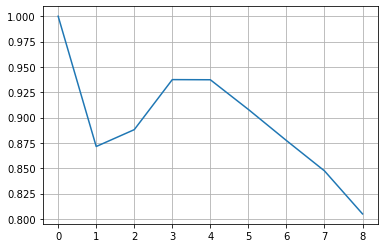

In [221]:
# ari = [1, 0.8202653224199385, 0.8416286144334483, 0.7894026408170359, 0.8742871351760084, 0.9488983261694727, 0.9261008104931284, 0.885678036573105, 0.8469975958807768]
x = range(len(ari))

plt.plot(x, ari)
plt.grid()
namefig = "stabilite_%s.pdf" % ( n_clusters )
plt.savefig(namefig, bbox_inches='tight', pad_inches=1.5)  # pdf

In [222]:
#Apres soutenance

In [229]:
ari1 = []

for n_df in range(len(df_time_limits)):
    n_clusters = 7

    df_sur_periode = df_time_limits[n_df]
    print('time_limits[n_df]', time_limits[n_df])
    # ind_df =  df_time_limits.index(df)

    df_commandes_stability \
        = df_sur_periode[['orders', 'review_score', 'payment_value',
                          'attente-jours', 'decalage-prevision-jours',
                          'rapidite_livraison']]

    x_matrix, scaler, x_matrix_not_scaled \
        = create_x_matrix_da_df(df_commandes_stability)

    x_matrix = pd.DataFrame(x_matrix).dropna().to_numpy()

    if n_df == 0:
        model = KMeans(n_clusters=n_clusters,
                       init='k-means++').fit(x_matrix)
        print('model.labels', model.labels_)

        scaler0 = scaler

        ari1.append(1)

    else:
        model2 = KMeans(n_clusters=n_clusters,
                        init='k-means++').fit(x_matrix)
        labels_true = model2.labels_
        pred1 = model.predict(x_matrix)
        # labels_pred1 = pred1.labels_
        ari_n1 = adjusted_rand_score(labels_true, pred1)
        ari1.append(ari_n1)

        now_ts = datetime.datetime.strptime("2018-09-03 23:59:00",
                                            "%Y-%m-%d %H:%M:%S")
        # fin du jour de la derniere commande livrée
        data_1 = datetime.datetime.strptime(str(time_limits[0][0]),
                                            "%Y-%m-%d %H:%M:%S")
        data_1 = data_1.strftime('%d-%m-%Y')
        data_2 = datetime.datetime.strptime(str(time_limits[0][1]),
                                            "%Y-%m-%d %H:%M:%S")
        # fin du jour de la derniere commande livrée
        data_2 = data_2.strftime('%d-%m-%Y')
        data_3 = datetime.datetime.strptime(str(time_limits[n_df][0]),
                                            "%Y-%m-%d %H:%M:%S")
        data_3 = data_3.strftime('%d-%m-%Y')
        data_4 = datetime.datetime.strptime(str(time_limits[n_df][1]),
                                            "%Y-%m-%d %H:%M:%S")
        # fin du jour de la derniere commande livrée
        data_4 = data_4.strftime('%d-%m-%Y')

        print(f'ARI score (concept 1) entre le modèle 0 (période %s --- %s) '
              f'et le modèle M{+n_df} (période %s --- %s) : %.3f\n'
              % (data_1, data_2, data_3, data_4, ari_n1))

    print(ari1)

time_limits[n_df] [Timestamp('2017-01-02 21:15:19'), Timestamp('2018-01-02 21:15:19')]
lista_nomi_colonne_per_matrice_x_matrix Index(['orders', 'review_score', 'payment_value', 'attente-jours',
       'decalage-prevision-jours', 'rapidite_livraison'],
      dtype='object')
TMP tmp.shape prima: (42556, 1)
tmp.shape dopo: (42556, 1)

ind 2
tmp.shape prima: (42556, 1)
tmp.shape dopo: (42556, 2)

ind 3
tmp.shape prima: (42556, 2)
tmp.shape dopo: (42556, 3)

ind 4
tmp.shape prima: (42556, 3)
tmp.shape dopo: (42556, 4)

ind 5
tmp.shape prima: (42556, 4)
tmp.shape dopo: (42556, 5)

ind 6
tmp.shape prima: (42556, 5)
tmp.shape dopo: (42556, 6)
x_matrix.shape: (42556, 6)
Shape after dropna: (42556, 6)
model.labels [3 1 3 ... 3 1 4]
[1]
time_limits[n_df] [Timestamp('2017-02-01 21:15:19'), Timestamp('2018-02-01 21:15:19')]
lista_nomi_colonne_per_matrice_x_matrix Index(['orders', 'review_score', 'payment_value', 'attente-jours',
       'decalage-prevision-jours', 'rapidite_livraison'],
      dtype=

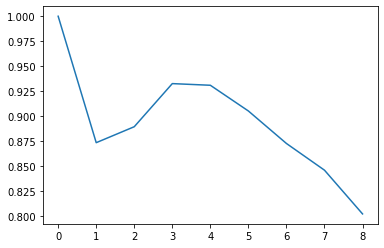

In [230]:
x = range(len(ari1))

plt.plot(x, ari1)

# namefig = "stabilite_%s.pdf" % ( n_clusters )
# plt.savefig(namefig, bbox_inches='tight', pad_inches=1.5)  # pdf


In [225]:
ari2 = []

for n_df in range(len(df_time_limits)):
    n_clusters = 7

    df_sur_periode = df_time_limits[n_df]
    print('time_limits[n_df]', time_limits[n_df])
    # ind_df =  df_time_limits.index(df)

    df_commandes_stability \
        = df_sur_periode[['orders', 'review_score', 'payment_value',
                          'attente-jours', 'decalage-prevision-jours',
                          'rapidite_livraison']]

    x_matrix, scaler, x_matrix_not_scaled = create_x_matrix_da_df(df_commandes_stability)

    x_matrix = pd.DataFrame(x_matrix).dropna().to_numpy()

    if n_df == 0:
        model = KMeans(n_clusters=n_clusters,
                       init='k-means++').fit(x_matrix)
        print('model.labels', model.labels_)

        scaler0 = scaler

        ari.append(1)

    else:
        model2 = KMeans(n_clusters=n_clusters,
                        init='k-means++').fit(x_matrix)
        labels_true = model2.labels_

        pred2 = model.predict(scaler0.transform(x_matrix_not_scaled))
        # labels_pred = pred.labels_
        print('pred', pred)

        ari_n2 = adjusted_rand_score(labels_true, pred2)

        ari2.append(ari_n2)

        now_ts = datetime.datetime.strptime("2018-09-03 23:59:00",
                                            "%Y-%m-%d %H:%M:%S")
        # fin du jour de la derniere commande livrée
        data_1 = datetime.datetime.strptime(str(time_limits[0][0]),
                                            "%Y-%m-%d %H:%M:%S")
        data_1 = data_1.strftime('%d-%m-%Y')
        data_2 = datetime.datetime.strptime(str(time_limits[0][1]),
                                            "%Y-%m-%d %H:%M:%S")
        # fin du jour de la derniere commande livrée
        data_2 = data_2.strftime('%d-%m-%Y')
        data_3 = datetime.datetime.strptime(str(time_limits[n_df][0]),
                                            "%Y-%m-%d %H:%M:%S")
        data_3 = data_3.strftime('%d-%m-%Y')
        data_4 = datetime.datetime.strptime(str(time_limits[n_df][1]),
                                            "%Y-%m-%d %H:%M:%S")
        # fin du jour de la derniere commande livrée
        data_4 = data_4.strftime('%d-%m-%Y')

        print(f'ARI score (concept 2) entre le modèle 0 (période %s --- %s) '
              f'et le modèle M{+n_df} (période %s --- %s) : %.3f\n'
              % (data_1, data_2, data_3, data_4, ari_n2))

    print(ari2)

time_limits[n_df] [Timestamp('2017-01-02 21:15:19'), Timestamp('2018-01-02 21:15:19')]
lista_nomi_colonne_per_matrice_x_matrix Index(['orders', 'review_score', 'payment_value', 'attente-jours',
       'decalage-prevision-jours', 'rapidite_livraison'],
      dtype='object')
TMP tmp.shape prima: (42556, 1)
tmp.shape dopo: (42556, 1)

ind 2
tmp.shape prima: (42556, 1)
tmp.shape dopo: (42556, 2)

ind 3
tmp.shape prima: (42556, 2)
tmp.shape dopo: (42556, 3)

ind 4
tmp.shape prima: (42556, 3)
tmp.shape dopo: (42556, 4)

ind 5
tmp.shape prima: (42556, 4)
tmp.shape dopo: (42556, 5)

ind 6
tmp.shape prima: (42556, 5)
tmp.shape dopo: (42556, 6)
x_matrix.shape: (42556, 6)
Shape after dropna: (42556, 6)
model.labels [1 5 1 ... 1 5 0]
[]
time_limits[n_df] [Timestamp('2017-02-01 21:15:19'), Timestamp('2018-02-01 21:15:19')]
lista_nomi_colonne_per_matrice_x_matrix Index(['orders', 'review_score', 'payment_value', 'attente-jours',
       'decalage-prevision-jours', 'rapidite_livraison'],
      dtype='

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
x = range(len(ari2))

plt.plot(x, ari2)

# namefig = "stabilite_%s.pdf" % ( n_clusters )
# plt.savefig(namefig, bbox_inches='tight', pad_inches=1.5)  # pdf
